In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\ashok\Downloads\PG\PGP Data Science\Machine Learning\Download\train.csv')
test = pd.read_csv(r'C:\Users\ashok\Downloads\PG\PGP Data Science\Machine Learning\Download\test.csv')

In [3]:
print(train.shape)
print(test.shape)

(9557, 143)
(23856, 142)


In [4]:
# 1. identify target variable
for i in train.columns:
    if i not in test.columns:
        print(i)

Target


In [5]:
# 2. Understand datatype

train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [6]:
test.dtypes.value_counts()

int64      129
float64      8
object       5
dtype: int64

In [7]:
# 3. biases in data
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


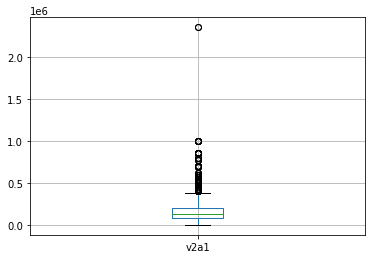

In [8]:
train.boxplot('v2a1')

In [9]:
# no significant result

In [10]:
# 4. Check whether all members of the house have the same poverty level.

#cannot identify poverty level of each member as no comparison available

In [11]:
# 5. Check if there is a house without a family head.
# parentesco1, =1 if household head

train.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [12]:
# 2973 family have household head

In [13]:
# 6. Set poverty level of the members and the head of the house within a family.
# insufficent data to make any significant conclusion

In [14]:
# 7. Count how many null values are existing in columns.
# 8. Remove null value rows of the target variable.
train.isna().sum().value_counts()

0       138
5         2
7928      1
6860      1
7342      1
dtype: int64

In [15]:
train = train.dropna()

In [16]:
train['Target'].isna().sum()

0

In [17]:
# no null value in target variable

In [18]:
# 9. Predict the accuracy using random forest classifier.

for i in train.columns:
    a=train[i].dtypes
    if a=='object':
        print(i)

Id
idhogar
dependency
edjefe
edjefa


In [19]:
train.drop(['Id', 'idhogar'], axis=1, inplace=True)

In [20]:
train['dependency'].value_counts()

yes          69
1.5          30
.5           19
2            16
.66666669     6
.75           5
4             4
.33333334     3
.25           2
.22222222     1
1.3333334     1
Name: dependency, dtype: int64

In [21]:
def convert(i):
    if i == 'yes':
        return(float(1))
    elif i == 'no':
        return(float(0))
    else:
        return(float(i))

In [22]:
train['dependency'] = train['dependency'].apply(convert)

In [23]:
train['edjefa']=train['edjefa'].apply(convert)
train['edjefe']=train['edjefe'].apply(convert)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
x = train.drop('Target', axis=1)
y = train.Target

In [26]:
x_col = x.columns

In [27]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [28]:
x_std = SS.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x_col)

In [29]:
X_train,X_test, Y_train, Y_test = train_test_split(x_std, y, test_size=.25, stratify=y, random_state=0)

In [30]:
Model = RandomForestClassifier(random_state=0)

In [31]:
Model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [32]:
Y_pred = Model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
confusion_matrix(Y_test, Y_pred)

array([[ 0,  0,  0,  1],
       [ 0,  1,  0,  1],
       [ 0,  0,  1,  2],
       [ 0,  0,  0, 33]], dtype=int64)

In [35]:
accuracy_score(Y_test, Y_pred)

0.8974358974358975

In [ ]:
# model is 89.7% accurate